In [16]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

import numpy as np
from math import sqrt

In [4]:
# read data
hrb = pd.read_csv('Data/HRB.csv', parse_dates = ['Quarter'])
hrb.index = hrb['Quarter']
hrb = hrb.drop('Quarter', 1)
hrb.columns = ['hrb']
hrb.head()

,hrb
Quarter,
2007-01-01,-0.36
2007-04-01,-0.38
2007-07-01,0.07
2007-10-01,1.85
2008-01-01,-0.34


In [5]:
# acf
acf_array = acf(hrb)
print(acf_array)

[ 1.         -0.22122696 -0.39856504 -0.26615093  0.83479804 -0.1901038
 -0.3475634  -0.23140368  0.71995993 -0.15661007 -0.29766783 -0.22097189
  0.61656933 -0.15022869 -0.27922022 -0.22465946  0.5725259  -0.08758288
 -0.24075584 -0.20363054  0.4797058  -0.06091139 -0.20935484 -0.18303202
  0.42481275 -0.03352559 -0.17471087 -0.16384328  0.34341079 -0.01734364
 -0.13820811 -0.12232172  0.28407164 -0.01927656 -0.11757974 -0.10386933
  0.20156485 -0.0120634  -0.07509539 -0.0707104   0.10222029]


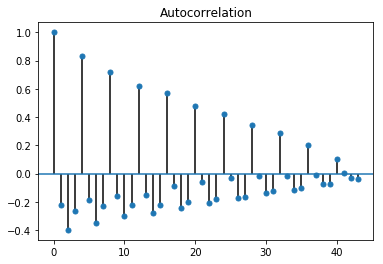

In [6]:
# plot
plot_acf(hrb, alpha = 1)
plt.show()

In [8]:
# msft data
msft = pd.read_csv('Data/MSFT.csv', parse_dates = ['Date'])
msft.index = msft['Date']
msft = msft.drop('Date', 1)
msft.columns = ['msft']
msft.head(3)

,msft
Date,
2012-08-06,26.107651
2012-08-07,26.377876
2012-08-08,26.438896


In [9]:
returns = msft.pct_change()

In [10]:
autocorrelation = returns['msft'].autocorr()
autocorrelation

0.020170157363370966

In [11]:
# number of obs
nobs = len(returns)
nobs

1258

In [12]:
# confidance interval
conf = 1.96/sqrt(nobs)
print(conf)

0.05526061969459089


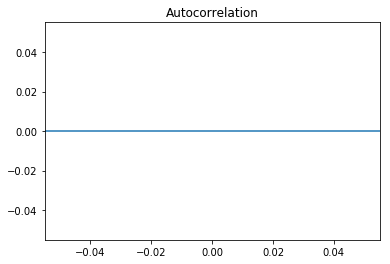

In [13]:
# plot with confidence interval
plot_acf(returns, alpha = 0.05, lags = 20)
plt.show()

In [15]:
# cannot forecast white noise

In [19]:
returns = np.random.normal(loc=0.02, scale=0.05, size=1000)
mean = np.mean(returns)
std = np.std(returns)
print("the mean is %5.3f and standard deviation is %5.3f" %(mean, std))

the mean is 0.016 and standard deviation is 0.050


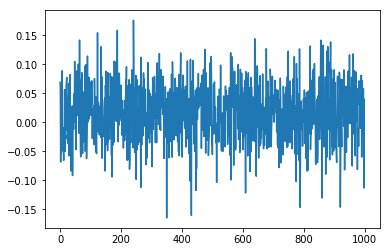

In [20]:
# plot
plt.plot(returns)
plt.show()

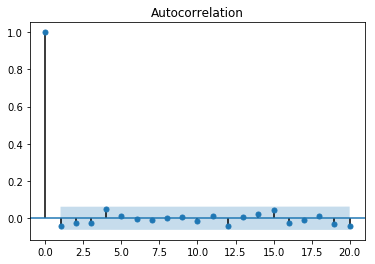

In [22]:
# plot acf of white noise
plot_acf(returns, lags = 20)
plt.show()

In [23]:
# get a random walk
steps = np.random.normal(loc = 0, scale = 1, size = 500)
steps[0] = 0
P = 100 + np.cumsum(steps)

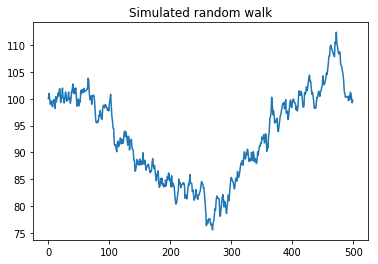

In [24]:
plt.plot(P)
plt.title('Simulated random walk')
plt.show()

In [26]:
# with drift
steps = np.random.normal(loc=0.001, scale=0.01, size=500) + 1
steps[0] = 1
P = 100 * np.cumprod(steps)

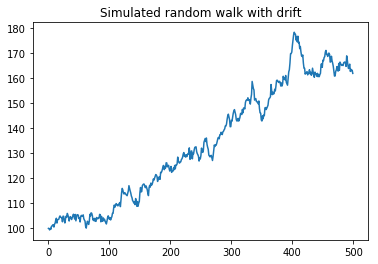

In [27]:
plt.plot(P)
plt.title('Simulated random walk with drift')
plt.show()

In [28]:
# how to determine 'random walk' or not
from statsmodels.tsa.stattools import adfuller

In [30]:
results = adfuller(msft['msft'])
print(results)

(0.18006177841534224, 0.9711208852369689, 0, 1257, {'5%': -2.863842063387667, '1%': -3.4355629707955395, '10%': -2.567995644141416}, 2279.300324698148)


In [31]:
# p-value 
results[1]

0.9711208852369689

In [ ]:
# returns - random walk or not

In [34]:
returns = msft['msft'].pct_change()
returns = returns.dropna()

In [36]:
results = adfuller(msft['msft'])
results

(0.18006177841534224,
 0.9711208852369689,
 0,
 1257,
 {'1%': -3.4355629707955395,
  '10%': -2.567995644141416,
  '5%': -2.863842063387667},
 2279.300324698148)

In [37]:
# p-valu
results[1]

0.9711208852369689

In [39]:
hrb.head()

,hrb
Quarter,
2007-01-01,-0.36
2007-04-01,-0.38
2007-07-01,0.07
2007-10-01,1.85
2008-01-01,-0.34


In [40]:
# seasonal adjustment
hrb_sa = hrb.diff(4)
print(hrb_sa.head(10))

             hrb
Quarter         
2007-01-01   NaN
2007-04-01   NaN
2007-07-01   NaN
2007-10-01   NaN
2008-01-01  0.02
2008-04-01 -0.04
2008-07-01 -0.05
2008-10-01  0.26
2009-01-01 -0.05
2009-04-01  0.02


In [41]:
hrb_sa = hrb_sa.dropna()

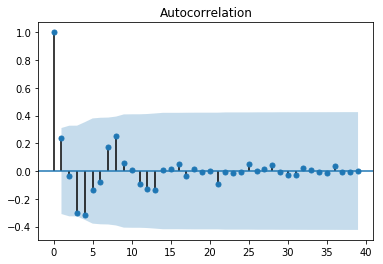

In [42]:
plot_acf(hrb_sa)
plt.show()